<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/9/9e/Logo_ENSG_G%C3%A9omatique_2012.svg/220px-Logo_ENSG_G%C3%A9omatique_2012.svg.png" style="margin-left:auto; margin-right:auto"/>


<center> 
    <h1>ENSG : statistiques appliquées en cartographie</h1> 
    <h2>Réaliser une analyse univariée à l'aide de Python</h2> 
    <h3>Florian Bayer, janvier 2022</h3> 
</center> 

<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

*   L'objectif de la seconde partie de ce TD est d'appliquer les connaissances acquises dans la première partie
  
*   Vous utiliserez de nouveau jupyter lab pour réaliser votre petite analyse

*   En cas de difficultés, ne restez pas bloqué et contactez moi

Attention, les notebooks que vous lancez à partir de la page Git du cours sont temporaires. Vous pouvez néanmoins les sauvegarder. La manipulation sera montrée en cours

Une autre solution, si vous disposez d'un compte google, est d'utiliser [Collaboratory](https://colab.research.google.com), mais il faudra importer les données csv. La manipulation sera montrée en cours


<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

# Consignes

La Fédération Française d'Etude de la Reproduction va organiser un congrès, dont le thème sera : état de l'offre de soins et infertilité en France. Il réunira des professionnels spécialisés dans l’assistance médicale à la procréation.

L'introduction de la session plénière aura comme support deux cartes projetées sur grand écran : 

- Evolution de la fécondité des départements français entre 2014 et 2019. 
- Les deux cartes serviront de base à la discussion d’un sujet de la session :  Vers de nouvelles dynamiques de la fécondité en France ?


Comme l’âge des femmes est un facteur d’infertilité et que la répartition de l’âge des femmes n’est pas identique sur les différents territoires étudiés, on vous demande d’utiliser l’indicateur conjoncturel de fécondité. 

Il correspond au nombre d'enfants qu'aurait une femme tout au long de sa vie, si les taux de fécondité observés l'année considérée à chaque âge demeuraient inchangés. Autrement dit, l’indicateur « gomme » l’effet de l’âge sur la fécondité sur la période et les territoires étudiés.

Les cartes seront produites par un prestataire, mais en tant qu’apprenti, on vous demande de lui rédiger par écrit différentes tâches : 
- La discrétisation des 2 cartes (en précisant les bornes "[  ]")
- La méthode de représentation à utiliser (quelle variable visuelle)
- La justification de l’ensemble de vos choix (types de variables, caractéristiques statistiques, choix de représentation, choix des méthodes de discrétisation etc.)

Vous devez choisir la ou les méthodes les plus adaptées selon vous et le nombre de classes, en justifiant vos choix. Référez-vous au cours sur les données, la discrétisation, la sémiologie graphique et le TD précédent sur l'univariée.

Les données sont fournies dans le dossier ./data/ et proviennent de l’Insee.

Attention, il n’est pas encore demandé de réaliser la carte 


<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

# 1. Importation des packages et des données


Pour vous aider, les premières étapes de l'analyse sont guidées

In [159]:
import pandas as pd # Pour importer les données dans un Dataframe
import seaborn as sns # Pour faire les graphiques
from scipy import stats # Un peu de stat
import statsmodels.api as sm # Et pourquoi pas un Q-Q plot...
import matplotlib.pyplot as plt
import numpy as np

Importez les données France à l'aide de  

```python
pd.read_csv()
```
dans la cellule ci-dessous

In [181]:
df_fr['ICF_2014_bin'] = pd.cut(df_fr['ICF_2014'],[0,1,2,3,5])
df_fr

,Code,Département,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019,ICF_2014_bin
0,01,Ain,1.98,1.87,1.88,1.82,1.86,1.80,"(1, 2]"
1,02,Aisne,2.14,2.09,1.97,2.02,1.95,1.91,"(2, 3]"
2,03,Allier,1.93,1.86,1.91,1.85,1.81,1.85,"(1, 2]"
3,04,Alpes-de-Haute-Provence,1.98,1.95,1.93,1.85,1.82,1.80,"(1, 2]"
4,05,Hautes-Alpes,1.93,1.86,1.80,1.69,1.77,1.78,"(1, 2]"
...,...,...,...,...,...,...,...,...,...
96,971,Guadeloupe,2.19,2.10,2.14,1.94,2.04,2.25,"(2, 3]"
97,973,Martinique,2.08,1.94,1.90,1.87,1.91,2.00,"(2, 3]"
98,972,Guyane,3.44,3.44,3.61,3.92,3.79,3.74,"(3, 5]"
99,974,La Réunion,2.44,2.46,2.43,2.44,2.40,2.39,"(2, 3]"


In [160]:
df_fr = pd.read_csv("./data/TD_France.csv", decimal=",", sep=";")
df_fr

,Code,Département,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
0,01,Ain,1.98,1.87,1.88,1.82,1.86,1.80
1,02,Aisne,2.14,2.09,1.97,2.02,1.95,1.91
2,03,Allier,1.93,1.86,1.91,1.85,1.81,1.85
3,04,Alpes-de-Haute-Provence,1.98,1.95,1.93,1.85,1.82,1.80
4,05,Hautes-Alpes,1.93,1.86,1.80,1.69,1.77,1.78
...,...,...,...,...,...,...,...,...
96,971,Guadeloupe,2.19,2.10,2.14,1.94,2.04,2.25
97,973,Martinique,2.08,1.94,1.90,1.87,1.91,2.00
98,972,Guyane,3.44,3.44,3.61,3.92,3.79,3.74
99,974,La Réunion,2.44,2.46,2.43,2.44,2.40,2.39


<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

# 2. Représentations graphiques

Utilisez le Dataframe précédemment créé pour réaliser les histogrammes et/ou les boxplots des données qui vous intéressent. N'oubliez pas, pour créer une nouvelle cellule de code, appuyez sur B (sauf sous Collaboratory)

Pour créer une cellule de texte (Markdown), ajoutez une nouvelle cellule avec B puis appuyez sur M


## 2.1 Les histogrammes

### 2.1.1 Avec toutes les données

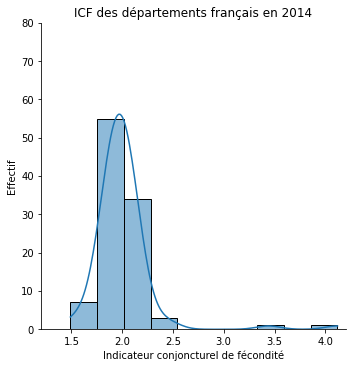

In [162]:
annee = 2014

hist_14 = sns.displot(data=df_fr, x=f"ICF_{annee}", bins=10, kde=True)
hist_14.set(title=f'ICF des départements français en {annee}',
         xlabel='Indicateur conjoncturel de fécondité',
         ylabel='Effectif',
         xlim = (1.2,4.2),
         ylim=(0, 80))

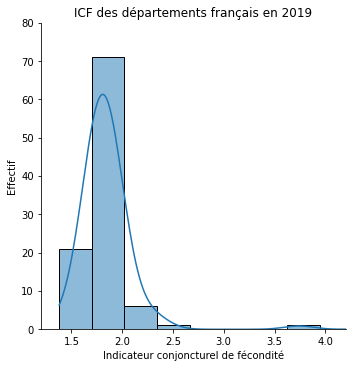

In [109]:
annee = 2019
hist_19 = sns.displot(data=df_fr, x=f"ICF_{annee}", bins=10, kde=True)
hist_19.set(title=f'ICF des départements français en {annee}',
         xlabel='Indicateur conjoncturel de fécondité',
         ylabel='Effectif',
         xlim = (1.2,4.2),
         ylim=(0, 80))

### 2.1.2 Sans les valeurs extrêmes

On décide de vérifier la répartition des données sans les valeurs extrèmes.

NB. Le dataframe est passé en melt pour pouvoir appliquer la méthode facet (graphiques 2014 et 2018 côte à côte). Les variables sont passées en ligne, une colonne value est ajoutée

In [163]:
df_fr_m = pd.melt(df_fr, id_vars=['Code','Département'])
df_fr_m.query("value < 3")

,Code,Département,variable,value
0,01,Ain,ICF_2014,1.98
1,02,Aisne,ICF_2014,2.14
2,03,Allier,ICF_2014,1.93
3,04,Alpes-de-Haute-Provence,ICF_2014,1.98
4,05,Hautes-Alpes,ICF_2014,1.93
...,...,...,...,...
599,94,Val-de-Marne,ICF_2019,1.96
600,95,Val-d'Oise,ICF_2019,2.29
601,971,Guadeloupe,ICF_2019,2.25
602,973,Martinique,ICF_2019,2.00


Pour supprimer les valeurs extrèmes, on filtre le dataframe et on ne conserve que 2014 et 2018

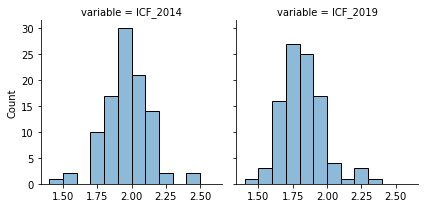

In [164]:
# Création, du facet, avec autant de colonne qu'il y a de modalités dans la colonne variable du dataframe
g = sns.FacetGrid(df_fr_m.query("variable in ('ICF_2014','ICF_2019') and value <3"),
                  col="variable", )

# Il n'est pas possible de faire un displot en facet... Seaborn recommande d'utiliser histplot
g.map_dataframe(sns.histplot, binwidth=0.1, binrange=(1.4, 2.5))

## 2.2 Boxplot pour voir les tendances

### 2.2.1 Avec toutes les valeurs

[Text(0.5, 1.0, "Evolution de l'inndicateurs conjoncturel de fécondité\ndans les départements français")]

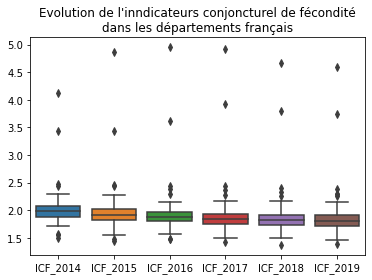

In [165]:
bp = sns.boxplot(data=df_fr)
bp.set(title="Evolution de l'inndicateurs conjoncturel de fécondité\ndans les départements français")

### 2.2.2 Sans les extrêmes

[Text(0.5, 1.0, "Evolution de l'inndicateurs conjoncturel de fécondité\ndans les départements français hors Mayotte et Guyane")]

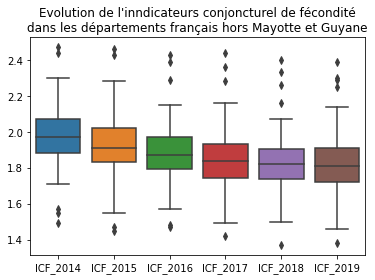

In [166]:
bp = sns.boxplot(data=df_fr.query("ICF_2014 <3 and ICF_2015 <3 "))
title = "Evolution de l'inndicateurs conjoncturel de fécondité\ndans les départements français hors Mayotte et Guyane"
bp.set(title=title)

## Exemple Altair

In [167]:
import altair as alt
alt.Chart(df_fr, title="Test Altair").mark_bar(size=15).encode(
    alt.X("ICF_2014:Q", bin=alt.Bin(extent=[1.2, 4.5], step=0.15)),
    y='count()',
    tooltip=['ICF_2014']
)


alt.Chart(...)

<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

# 3. Calculs statistiques

Réalisez les calculs qui vous permettront de mieux interpréter vos données, leur forme, les points d'attention...

## 3.1.1 Univariée avec toutes les données

In [168]:
df_fr[['ICF_2014','ICF_2019']].describe()

,ICF_2014,ICF_2019
count,101.000000,101.000000
mean,2.006535,1.871188
std,0.302104,0.371425
min,1.490000,1.380000
25%,1.880000,1.720000
50%,1.980000,1.810000
75%,2.080000,1.920000
max,4.120000,4.590000


## 3.1.2 Univariée sans les extrêmes

In [169]:
df_fr[['ICF_2014','ICF_2019']].query("ICF_2014 < 3 or ICF_2019 < 3").describe()

,ICF_2014,ICF_2019
count,99.000000,99.000000
mean,1.970707,1.824848
std,0.159016,0.165944
min,1.490000,1.380000
25%,1.880000,1.720000
50%,1.970000,1.810000
75%,2.070000,1.910000
max,2.470000,2.390000


## 3.2 Exemples sur les quantiles

### 3.2.1 Afficher les 5 premiers % et 95 derniers %

In [170]:
df_fr.quantile([.05, .95])

,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
0.05,1.75,1.69,1.67,1.63,1.60,1.61
0.95,2.26,2.21,2.15,2.16,2.16,2.25


### 3.2.2 Afficher les outliers au-delà de 1.5* l'interval interquartile (IQR)

In [171]:
# Calcul de l'IQR
Q1 = df_fr.quantile(0.25)
Q3 = df_fr.quantile(0.75)
IQR = Q3 - Q1

# Un autre moyen de filtrer en excluant les données inférieures à Q1 - 1.5 * IQR OU (|) supérieures ) Q3 + 1.5 * IQR sur un axe
df_iqr = df_fr[~((df_fr < (Q1 - 1.5 * IQR)) |(df_fr > (Q3 + 1.5 * IQR))).any(axis=1)]
df_iqr

/home/florian/miniconda3/envs/geo/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


,Code,Département,ICF_2014,ICF_2015,ICF_2016,ICF_2017,ICF_2018,ICF_2019
0,01,Ain,1.98,1.87,1.88,1.82,1.86,1.80
1,02,Aisne,2.14,2.09,1.97,2.02,1.95,1.91
2,03,Allier,1.93,1.86,1.91,1.85,1.81,1.85
3,04,Alpes-de-Haute-Provence,1.98,1.95,1.93,1.85,1.82,1.80
4,05,Hautes-Alpes,1.93,1.86,1.80,1.69,1.77,1.78
...,...,...,...,...,...,...,...,...
90,90,Territoire de Belfort,1.96,1.86,1.90,1.89,1.92,1.86
91,91,Essonne,2.20,2.21,2.15,2.16,2.16,2.14
92,92,Hauts-de-Seine,1.98,1.93,1.93,1.86,1.83,1.78
94,94,Val-de-Marne,2.13,2.07,2.02,2.01,1.97,1.96


## 3.3 Tests de normalité

### 3.3.1 Tests de la normalité sans les extrêmes

In [172]:
stats.shapiro(df_fr.query("ICF_2014 < 3")['ICF_2014'])

ShapiroResult(statistic=0.9731698632240295, pvalue=0.04050901532173157)

Le Shapiro test montre que la série 2014 est à la limite de la significativité (p-value = 0.04). 
L'histogramme laissait cependant suggérer une loi normale. On vérifie le kurtosis et le skew pour comprendre

In [124]:
s = df_fr.query("ICF_2014 < 3")['ICF_2014'].skew()
k = df_fr.query("ICF_2014 < 3")['ICF_2014'].kurtosis()

print(f"""Pour la série 2014 : 
Skew = {s:.3f}
Kurtosis = {k:.3f}
""")

Pour la série 2014 : 
Skew = 0.028
Kurtosis = 1.624



Le coefficient d'asymétrie (Skew) est très proche de 0, ce qui tend à montrer la symétrie de la distribution

Le kurtosis est égal = 1.6, ce qui explique pourquoi le Shapiro-test est à la limite de la significativité. Un kurtosis standardisé de loi normale est normalement proche de 0

In [119]:
stats.shapiro(df_fr.query("ICF_2019 < 3")['ICF_2019'])

ShapiroResult(statistic=0.9591990113258362, pvalue=0.0037454513367265463)

Pour 2019, le shapiro-test montre que la série est loin de suivre une loi normale

On peut également tester si les deux moyennes et les deux variances sont significativement différentes :
- On utilise un test de Barlet pour la variance (ou de Levene selon le contexte) 
- un t-test pour la moyenne car les variances ne sont pas différentes entre les deux séries

In [173]:
icf14 = df_fr.query("ICF_2014 < 3")['ICF_2014']
icf19 = df_fr.query("ICF_2019 < 3")['ICF_2019']
icf18 = df_fr.query("ICF_2018 < 3")['ICF_2018']
lr, lp = stats.bartlett(icf14,icf19) # lr correspond au résultat du test de Barlet, lp à sa p-value
tr, tp = stats.ttest_ind(icf14,icf19) 

print(f"""
Barlet p-value= {lp:.3f}
Ttest p-value= {tp:.9f}
""")


Barlet p-value= 0.674
Ttest p-value= 0.000000002



Les variances des deux séries sans ls extrêmes ne sont pas significativement différentes, les moyennes sont significativement différentes

### Une fonction pour tester les variances et les moyennes

In [177]:
def test_moyenne(x, y):
    """
    test de l'égalité de deux moyennes et de leur variance. Vérification de la normalité des données
    et ajustement des tests si nécessaire (normalité, égalité des variances)
    @return: str
    @type x: np.array
    @type y: np.array
    """
    # TODO : à passer en class
    # test de la normalité
    sv_x, sp_x = stats.shapiro(x)
    sv_y, sp_y = stats.shapiro(y)

    if sp_x < 0.05 or sp_y < 0.05:
        var = "H1"
        test_n = "Au moins une distribution ne suit pas une loi normale"

    else:
        var = "H0"
        test_n = "Les deux distributions suivent une loi normale"

    # test de variance, en fonction de la normalité des données
    if var == 'H0':
        vv, vp = stats.bartlett(x, y)
        if vp < 0.05:
            test_v = f"Les variances sont significativement différentes: p= {vp:.4f}"
        else:
            test_v = f"Les variances ne sont pas significativement différentes: p= {vp:.4f}"

    else:
        vv, vp = stats.levene(x, y)
        if vp < 0.05:
            test_v = f"Les variances sont significativement différentes: p= {vp:.4f}"
        else:
            test_v = f"Les variances ne sont pas significativement différentes: p= {vp:.4f}"

    # test d'égalité des moyennes, en fonction de l'égalité des variances
    if vp >= 0.05:
        tv, tp = stats.ttest_ind(x, y, equal_var=True)
    else:
        tv, tp = stats.ttest_ind(x, y, equal_var=False)  

    if tp >= 0.05:
        test_m = f"Les moyennes ne sont pas significativement différentes: {np.mean(x):.4f} et {np.mean(y):.4f}, p= {tp:.4f}"
    else:
        test_m = f"Les moyennes sont significativement différentes: {np.mean(x):.4f} et {np.mean(y):.4f}, p= {tp:.4f}"

    return print(f"""{test_n}\n{test_v}\n{test_m}""")

test_moyenne(icf14,icf19)
#test_moyenne(icf18,icf19)

Au moins une distribution ne suit pas une loi normale
Les variances ne sont pas significativement différentes: p= 0.7844
Les moyennes sont significativement différentes: 1.9707 et 1.8248, p= 0.0000


## 3.3.2 QQ-plot sans les extrêmes

/home/florian/miniconda3/envs/geo/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


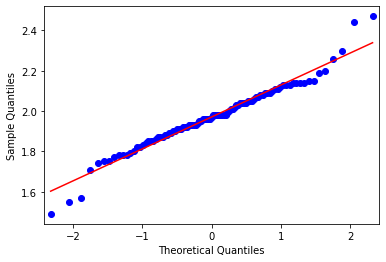

In [175]:
sm.qqplot(df_fr.query("ICF_2014 < 3")['ICF_2014'], line='s')
plt.show()

/home/florian/miniconda3/envs/geo/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


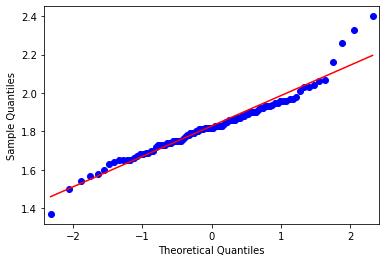

In [176]:
sm.qqplot(df_fr.query("ICF_2018 < 3")['ICF_2018'], line='s')
plt.show()

<hr style="height: 2px; color:  #94bd13 ; background-color:  #94bd13; width: 100%; border: none;">

# 4. Réponses à la demande

Avant de répondre à la demande, 

- Essayez d'interpréter les résultats des graphiques et des calculs. 
- Que pouvez-vous tirer de cette analyse univariée ?
- Pensez aux objectifs des cartes, au contexte, au public.

Rédigez ensuite vos réponses et proposez une ou plusieurs méthodes de discrétisation



